In [1]:
# showing plots for data from 2/28/25
# the sweeping data was collected with 1 source meter, collecting I_DS and I_GS
# this data was DMF-based aptamer functionalization on b3d2
# the time series data was done only using 1 channel
# the timeseries was done with 0.01X PBS

In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt 
from scipy.optimize import curve_fit

In [10]:
# filenames

# filenames for functionalization
filenames_a_func = ['data/data_2-28-25/b3d2a-id.csv', 
                 'data/data_2-28-25/b3d2a-pbase.csv', 
                 'data/data_2-28-25/b3d2a-apt.csv',
                 'data/data_2-28-25/b3d2a-eta.csv',]

filenames_b_func = ['data/data_2-28-25/b3d2c-id.csv', 
                 'data/data_2-28-25/b3d2c-pbase(blank).csv', 
                 'data/data_2-28-25/b3d2c-apt(blank).csv',
                 'data/data_2-28-25/b3d2c-eta(blank).csv',]


In [12]:
def load_csv_data_1ch(filenames):
    '''
    for multiple file
    6, 4
    '''
    data_list = []
    for filename in filenames:
        data_device = np.genfromtxt(filename, delimiter=',', skip_header=1, filling_values=np.nan).T[[6, 4], :]
        data_device = np.nan_to_num(data_device)
        data_list.append(data_device)
    data = np.array(data_list)
    data[:, 1, :] *= 1000.0
    return data[:,:,-200:][:, :, ::-1] # (num_device, (voltages/currents), voltage_sweep)

def get_dirac_points(IV_mx):
    dirac_idx = np.argmin(IV_mx[:,1,:], axis=-1)
    dirac_ivs = np.array([IV_mx[idx,:,dirac_idx[idx]] for idx in range(len(dirac_idx))])
    return dirac_ivs

data_b3d2a_func = load_csv_data_1ch(filenames_a_func)
data_b3d2a_dirac = get_dirac_points(data_b3d2a_func)

data_b3d2c_func = load_csv_data_1ch(filenames_b_func)
data_b3d2c_dirac = get_dirac_points(data_b3d2c_func)
print(data_b3d2a_func.shape)
print(data_b3d2a_dirac.shape)
print('---')


(4, 2, 200)
(4, 2)
---


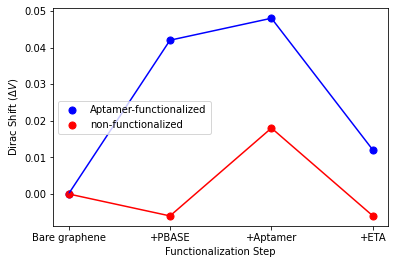

In [21]:
def plot_func_steps(dirac_mx_func_list, dirac_mx_func_blank_list, title):

    xlabels = ['Bare graphene', '+PBASE', '+Aptamer', '+ETA']
    labels = ['Aptamer-functionalized', 'non-functionalized'] # , 'DMF functionalization']
    colors = ['blue', 'red', 'orange']
    for dev_num in range(len(dirac_mx_func_list)):
        plt.scatter(range(dirac_mx_func_list[dev_num][:,0].size), dirac_mx_func_list[dev_num][:,0] - dirac_mx_func_list[dev_num][0,0], s=50, color=colors[0], label=labels[0])
        plt.plot(range(dirac_mx_func_list[dev_num][:,0].size), dirac_mx_func_list[dev_num][:,0] - dirac_mx_func_list[dev_num][0,0], color=colors[0], label=labels[0])

        plt.scatter(range(dirac_mx_func_blank_list[dev_num][:,0].size), dirac_mx_func_blank_list[dev_num][:,0] - dirac_mx_func_blank_list[dev_num][0,0], s=50, color=colors[1], label=labels[1])
        plt.plot(range(dirac_mx_func_blank_list[dev_num][:,0].size), dirac_mx_func_blank_list[dev_num][:,0] - dirac_mx_func_blank_list[dev_num][0,0], color=colors[1], label=labels[1])

    handles, labels = plt.gca().get_legend_handles_labels()
    unique = {}
    for handle, label in zip(handles, labels):
        if label not in unique:
            unique[label] = handle
    # sorted_unique = dict(sorted(unique.items(), key=lambda x: x[0]))
    # plt.legend(sorted_unique.values(), sorted_unique.keys())
    plt.legend(unique.values(), unique.keys())

    plt.xlabel('Functionalization Step')
    plt.ylabel(rf'Dirac Shift $(\Delta V)$')
    plt.title(title)
    plt.xticks(range(len(xlabels)), xlabels)
    plt.show()
    plt.close()

plot_func_steps([data_b3d2a_dirac], [data_b3d2c_dirac], '')

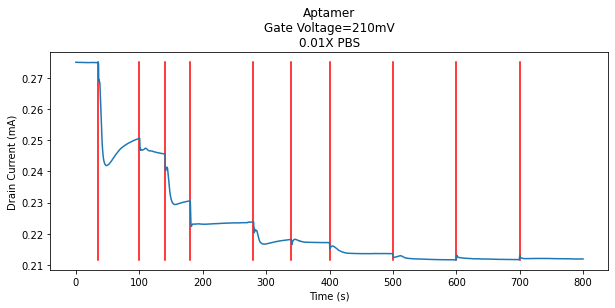

In [27]:
def plot_time_series_1ch(file_path, max_time_sample, xval_action_list, title):
    data_timesweep = np.genfromtxt(file_path, delimiter=",", dtype=np.float64, filling_values=np.nan)
    data_timesweep = data_timesweep[1:max_time_sample,[4,3]].T
    
    data_timesweep[1,:] *= 1000.0
    
    plt.figure(figsize=(10, 4))
    
    minim = np.min(data_timesweep[1])
    maxim = np.max(data_timesweep[1])
    for xval in xval_action_list:
        plt.plot([xval, xval], [minim, maxim], color='r')
    
    plt.plot(data_timesweep[0], data_timesweep[1])
    plt.xlabel('Time (s)')
    plt.ylabel('Drain Current (mA)')
    plt.title(title)
    plt.show()
    plt.close()


file_path = 'data/data_2-28-25/b3d2a-timesweep.csv'
max_time_sample = 8000
xval_action_list = [35, 100, 140, 180, 280, 340, 400, 500, 600, 700]
title = 'Aptamer\nGate Voltage=210mV\n0.01X PBS'
plot_time_series_1ch(file_path=file_path, 
                     max_time_sample=max_time_sample, 
                     xval_action_list=xval_action_list, 
                     title=title)
